#### BACKTESTING PORTFOLIO OF STRATEGIES 

In [1]:
import os 
import numpy as np 
import pandas as pd 

path = 'strat_returns/Testing/kelly_returns/'

In [2]:
### FILES 
files = os.listdir(path)
#files.reverse()
print(files)
spy_idx = files.index('SPY.csv')

### COLUMNS 
cols = [ 'daily_ret', 'half_kelly']

weights = { #0.964
    'SPY' : 0.5,
    'XLU' : 0.15,
    'AMLP' : 0.087,
    'USO' : 0.087,
    'XLI' : 0.17
}

['AMLP.csv', 'IVE.csv', 'IVW.csv', 'IWM.csv', 'SPY.csv', 'USO.csv', 'XLF.csv', 'XLI.csv', 'XLU.csv', 'XLV.csv']


In [3]:
## DF 
df = pd.read_csv( path + files.pop(spy_idx), index_col= 'date')
#df = df[cols]
df['ticker'] = 'SPY'
df.tail(10)

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
date,,,,,,,,,
2025-03-14,1,2.0,62660300.0,20267.0,44381.73,2887470.83,0.015610,4.0,SPY
2025-03-17,1,1.0,49008700.0,20426.0,0.00,2887470.83,0.000000,4.0,SPY
2025-03-18,2,1.0,66041400.0,20649.0,0.00,2887470.83,0.000000,4.0,SPY
2025-03-19,1,1.0,66556000.0,20426.0,0.00,2887470.83,0.000000,4.0,SPY
2025-03-20,2,1.0,62958200.0,20486.0,0.00,2887470.83,0.000000,4.0,SPY
2025-03-21,1,1.0,83763000.0,20479.0,0.00,2887470.83,0.000000,4.0,SPY
2025-03-24,1,1.0,58766800.0,20118.0,0.00,2887470.83,0.000000,4.0,SPY
2025-03-25,2,1.0,38355700.0,20070.0,0.00,2887470.83,0.000000,4.0,SPY
2025-03-26,0,1.0,51848300.0,20313.0,0.00,2887470.83,0.000000,4.0,SPY


In [4]:

for file in files: 
    
    df_file = pd.read_csv(f"{path}/{file}", 
                          index_col='date') 
    
    #df_file = df_file[cols]
    df_file['ticker'] = file.replace('.csv', '')
    df = pd.concat([df, df_file], axis = 0 )

In [5]:
df.tail()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
date,,,,,,,,,
2025-03-21,2,2.0,7635300.0,167638.0,-3355.76,6117129.58,-0.000548,4.0,XLV
2025-03-24,1,2.0,6500600.0,166282.0,-121388.86,5995740.72,-0.019844,4.0,XLV
2025-03-25,0,1.0,6502000.0,165092.0,0.00,5995740.72,0.000000,4.0,XLV
2025-03-26,2,2.0,8758600.0,165696.0,155751.24,6151491.96,0.025977,4.0,XLV
2025-03-27,2,2.0,2965198.0,170106.0,-22116.78,6129375.18,-0.003595,4.0,XLV


In [6]:
df = df.dropna()
df = df.reset_index()
df['date'] = pd.to_datetime(df['date'])
#df = df[df['daily_ret'] != 0] #### removes symbols from the data which do not trade on that day 

df = df.sort_values(by = ['date', 'half_kelly'], ascending=[True, False], axis = 0) 
df = df.set_index('date')
df.tail()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
date,,,,,,,,,
2025-03-27,2,2.0,546231.0,75373368.0,-4522405.08,1.786914e+09,-0.002524,4.0,IVW
2025-03-27,2,2.0,11355745.0,105702.0,90900.72,5.494131e+06,0.016823,4.0,IWM
2025-03-27,2,2.0,16877561.0,1284542.0,423895.86,1.652885e+07,0.026321,4.0,XLF
2025-03-27,2,0.0,3316476.0,1140859.0,-79863.13,2.200432e+07,-0.003616,4.0,XLU
2025-03-27,2,2.0,2965198.0,170106.0,-22116.78,6.129375e+06,-0.003595,4.0,XLV


In [ ]:
df[df['half_kelly']> 1 ]#.ticker.value_counts()

In [7]:
### TOP HK VALUES 

import holidays
us_holidays = holidays.US()

date_range =  pd.date_range(start=df.index.min(), end=df.index.max())
date_range = [date for date in date_range if date not in us_holidays]
    

In [8]:
traded_tickers = df.groupby(level=0)['half_kelly'].count().to_frame()
traded_tickers.columns = ['n_tickers']
traded_tickers.n_tickers.value_counts()

n_tickers
9     3664
10     738
8      312
Name: count, dtype: int64

In [ ]:
#df.merge(traded_tickers, left_index=True, right_index = True)

In [9]:
df.head()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker
date,,,,,,,,,
2006-07-03,2,1.0,23914000.0,445.0,0.0,10000.0,0.0,4.0,SPY
2006-07-03,1,1.0,139400.0,896.0,0.0,10000.0,0.0,4.0,IVE
2006-07-03,2,1.0,585600.0,3463.0,0.0,10000.0,0.0,4.0,IVW
2006-07-03,1,1.0,22967800.0,710.0,0.0,10000.0,0.0,4.0,IWM
2006-07-03,1,1.0,4077195.0,2191.0,0.0,10000.0,0.0,4.0,XLF


In [10]:
##### EXPERIMENTAL CELL #######

#### FILTERING FOR HALF KELLY > 1 
df2 = df[df['half_kelly'] >= 1]
#traded_tickers = df2.groupby(level=0)['half_kelly'].count().to_frame()
#traded_tickers.columns = ['n_tickers']

### 1 / N PORTFOLIO 
traded_tickers['weights'] = 1 / traded_tickers['n_tickers'] 

df2 = df2.merge(traded_tickers, left_index=True, right_index = True)

df2['levered_w'] = df2['weights'] * df2['half_kelly']
df2['return'] = df2['daily_ret'] * df2['levered_w']
df2.tail()

,labels,predictions,Volume,shares,net_pnl,eod_equity,daily_ret,half_kelly,ticker,n_tickers,weights,levered_w,return
date,,,,,,,,,,,,,
2025-03-27,2,2.0,546231.0,75373368.0,-4522405.08,1.786914e+09,-0.002524,4.0,IVW,8,0.125,0.5,-0.001262
2025-03-27,2,2.0,11355745.0,105702.0,90900.72,5.494131e+06,0.016823,4.0,IWM,8,0.125,0.5,0.008412
2025-03-27,2,2.0,16877561.0,1284542.0,423895.86,1.652885e+07,0.026321,4.0,XLF,8,0.125,0.5,0.013160
2025-03-27,2,0.0,3316476.0,1140859.0,-79863.13,2.200432e+07,-0.003616,4.0,XLU,8,0.125,0.5,-0.001808
2025-03-27,2,2.0,2965198.0,170106.0,-22116.78,6.129375e+06,-0.003595,4.0,XLV,8,0.125,0.5,-0.001798


In [ ]:
df2[df2['n_tickers'] == 1]

In [ ]:
#### FILTERING FOR HALF KELLY > 1 
df2 = df[df['half_kelly'] >= 1]
traded_tickers = df2.groupby(level=0)['half_kelly'].count().to_frame()
traded_tickers.columns = ['n_tickers']

### 1 / N PORTFOLIO 
traded_tickers['weights'] = 1 / traded_tickers['n_tickers'] 

df2 = df2.merge(traded_tickers, left_index=True, right_index = True)

df2['levered_w'] = df2['weights'] * df2['half_kelly']
df2['return'] = df2['daily_ret'] * df2['weights']
df2.tail()

In [11]:
df_daily = df2.groupby(level = 0)['return'].sum().to_frame()
df_daily['cum_ret'] = df_daily['return'].cumsum()
df_daily['capital'] = 6e4
df_daily['daily_pnl'] = df_daily['capital'] * df_daily['cum_ret']

#df_daily = df_daily[df_daily.index <= '2016-01-01']

df_daily.head()

,return,cum_ret,capital,daily_pnl
date,,,,
2006-07-03,0.000000,0.000000,60000.0,0.000000
2006-07-05,0.000000,0.000000,60000.0,0.000000
2006-07-06,-0.020274,-0.020274,60000.0,-1216.428600
2006-07-07,-0.002189,-0.022463,60000.0,-1347.789869
2006-07-10,0.001698,-0.020765,60000.0,-1245.910463


Text(0, 0.5, 'Cumulative Return')

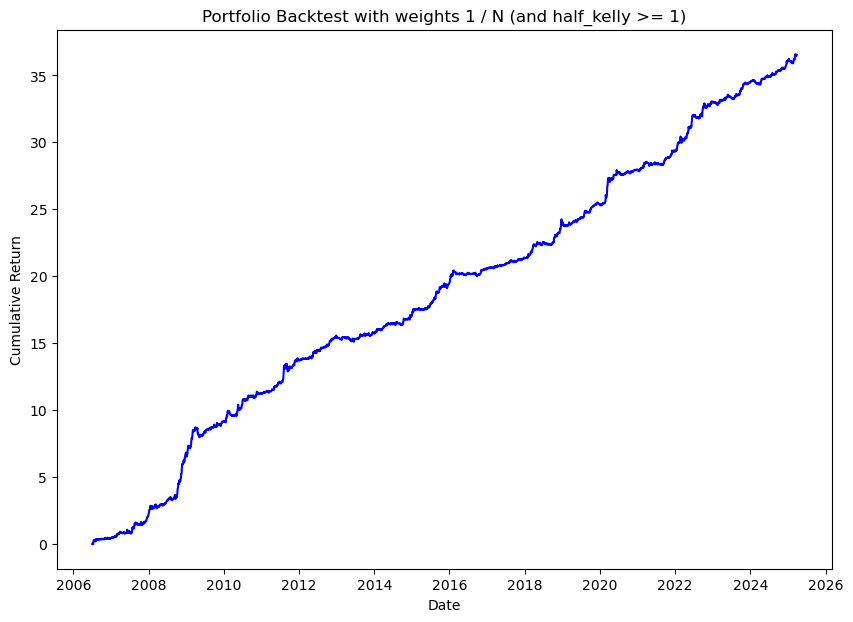

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize= [10,7])
plt.plot(df_daily.index, df_daily['cum_ret'], color = 'b')
plt.title('Portfolio Backtest with weights 1 / N (and half_kelly >= 1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

In [13]:
#####################################################################
 # PERFORMANCE EVALUATION 
#####################################################################

#####   MAX DRAWDOWN
from calculateMaxDD import calculateMaxDD

cum_ret = np.cumprod(1+ df_daily['return']) - 1
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cum_ret.values)

#####   SHARPE RATIO
sharpe_ratio = round(np.sqrt(252) * np.mean(df_daily['return']) / np.std(df_daily['return']),2)

#####   AVG YEARLY RETURN AND STD
mean_ret = df_daily['return'].mean() * 252
std = df_daily['return'].std()*np.sqrt(252)

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Maximum Drawdown: {round(maxDrawdown,4)}')
print(f'Max Drawdown Duration: {maxDrawdownDuration} days' )
print(f'Start day Drawdown: {startDrawdownDay}')
print(f"Average Yearly Return: {round(mean_ret*100, 2)} %")

Sharpe Ratio: 2.83
Maximum Drawdown: -0.5796
Max Drawdown Duration: 203.0 days
Start day Drawdown: 717
Average Yearly Return: 195.27 %


Text(0, 0.5, 'HK')

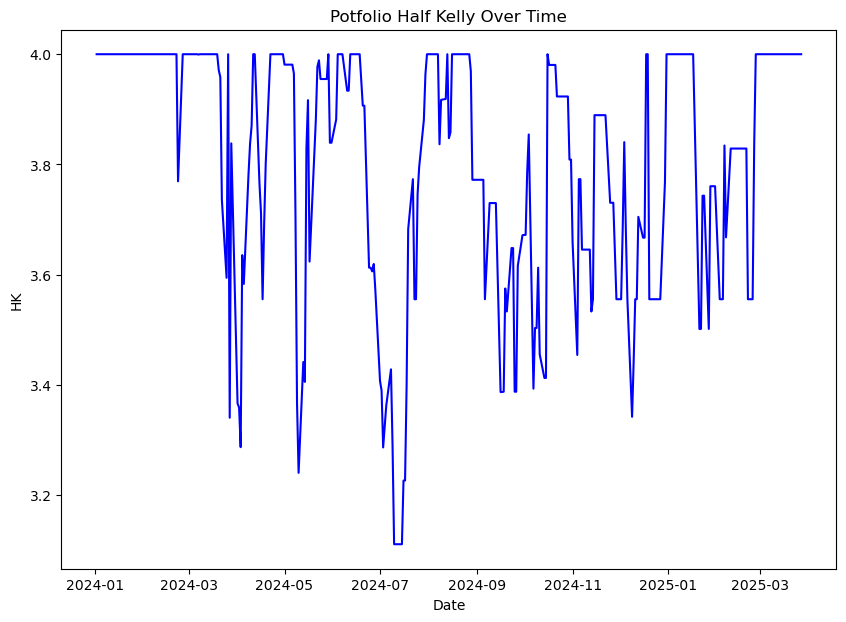

In [14]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [15]:
df_daily['month'] = df_daily.index.month
df_daily.groupby('month')['return'].mean() * 30

month
1     0.298716
2     0.239428
3     0.246908
4     0.088139
5     0.182213
6     0.270634
7     0.125372
8     0.250244
9     0.192320
10    0.289076
11    0.259969
12    0.335213
Name: return, dtype: float64

In [16]:
df_daily['year'] = df_daily.index.year
monthly_pnl = df_daily.groupby(['year', 'month'])['return'].sum().to_frame()
monthly_pnl.tail(50)

return
year month          
2021 2      0.244572
     3      0.218303
     4     -0.162811
     5      0.066904
     6      0.008516
     7     -0.020375
     8     -0.050333
     9      0.465099
     10     0.069167
     11     0.380937
     12     0.070689
2022 1      0.650819
     2      0.133679
     3      0.092866
     4      0.470134
     5      0.397178
     6      0.971193
     7     -0.171287
     8      0.200850
     9      0.629042
     10    -0.118833
     11     0.137865
     12     0.269549
2023 1     -0.069799
     2      0.096459
     3      0.124729
     4      0.037345
     5      0.381330
     6     -0.229308
     7      0.016708
     8      0.181410
     9      0.382762
     10     0.447150
     11     0.023397
     12     0.114113
2024 1      0.143338
     2     -0.192890
     3     -0.081478
     4      0.377193
     5      0.147230
     6      0.054093
     7      0.164832
     8      0.000425
     9      0.263908
     10     0.184291
     11    -0.047701
     12     0.623202
2025 1     -0.028779
     2      0.063434
     3      0.375995

In [17]:
yearly_pnl = df_daily.groupby(['year'])['return'].sum().to_frame()
yearly_pnl.tail(50)

,return
year,
2006,0.394656
2007,1.802384
2008,4.378658
2009,2.612071
2010,2.036371
2011,2.481804
2012,1.698172
2013,0.299306
2014,1.344196


### NEXT: USE THE WEIGHTS CURRENTLY IN USE!

In [ ]:
### DISCRETIONARY WEIGHTS 
df2['weights'] = df2['ticker'].map(weights)
df2 = df2.dropna()

df2.head()

In [ ]:
df_daily = df2.groupby(level = 0)['return'].sum().to_frame()
df_daily['cum_ret'] = df_daily['return'].cumsum()
df_daily['capital'] = 6e4
df_daily['eod_capital'] = df_daily['capital'] * df_daily['cum_ret']

#df_daily = df_daily[df_daily.index <= '2016-01-01']

df_daily.head()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize= [10,7])
plt.plot(df_daily.index, df_daily['cum_ret'], color = 'b')
plt.title('Portfolio Backtest with weights 1 / N (and half_kelly >= 1)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')

In [ ]:
#####################################################################
 # PERFORMANCE EVALUATION 
#####################################################################

#####   MAX DRAWDOWN
from calculateMaxDD import calculateMaxDD

cum_ret = np.cumprod(1+ df_daily['return']) - 1
maxDrawdown, maxDrawdownDuration, startDrawdownDay=calculateMaxDD(cum_ret.values)

#####   SHARPE RATIO
sharpe_ratio = round(np.sqrt(252) * np.mean(df_daily['return']) / np.std(df_daily['return']),2)

#####   AVG YEARLY RETURN AND STD
mean_ret = df_daily['return'].mean() * 252
std = df_daily['return'].std()*np.sqrt(252)

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Maximum Drawdown: {round(maxDrawdown,4)}')
print(f'Max Drawdown Duration: {maxDrawdownDuration} days' )
print(f'Start day Drawdown: {startDrawdownDay}')
print(f"Average Yearly Return: {round(mean_ret*100, 2)} %")

In [ ]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
#hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [ ]:
hk = df2.groupby(level = 0)['levered_w'].sum().to_frame()
#hk = hk[hk.index >= '2024-01-02']
plt.figure(figsize=[10,7])
#plt.plot(hk.index, hk['levered_w'], color = 'b')
plt.hist(hk['levered_w'], color = 'b')
plt.title('Potfolio Half Kelly Over Time')
plt.xlabel('Date')
plt.ylabel('HK')

In [ ]:
df_daily['year'] = df_daily.index.year
df_daily.groupby('year')['return'].cumsum()

In [ ]:
df_daily[df_daily['year'] == 2024]['return'].sum()